### Import libraries 

In [1]:

import numpy as np # linear algebra 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv) 
import matplotlib.pyplot as plt # for data visualization purposes 
import seaborn as sns # for statistical data visualization 

### Import dataset

In [55]:
df=pd.read_csv('adult.csv') 
print(df.shape) 
print(df.head()) 

(32560, 15)
   39          State-gov   77516   Bachelors  13        Never-married  \
0  50   Self-emp-not-inc   83311   Bachelors  13   Married-civ-spouse   
1  38            Private  215646     HS-grad   9             Divorced   
2  53            Private  234721        11th   7   Married-civ-spouse   
3  28            Private  338409   Bachelors  13   Married-civ-spouse   
4  37            Private  284582     Masters  14   Married-civ-spouse   

         Adm-clerical   Not-in-family   White     Male  2174  0  40  \
0     Exec-managerial         Husband   White     Male     0  0  13   
1   Handlers-cleaners   Not-in-family   White     Male     0  0  40   
2   Handlers-cleaners         Husband   Black     Male     0  0  40   
3      Prof-specialty            Wife   Black   Female     0  0  40   
4     Exec-managerial            Wife   White   Female     0  0  40   

    United-States   <=50K  
0   United-States   <=50K  
1   United-States   <=50K  
2   United-States   <=50K  
3         

### Exploratory data analysis 
#### View top 5 rows of dataset 

In [85]:
df.shape 
print(df.head()) 
print(df.head()) 

   age          workclass  fnlwgt   education  education_num  \
0   50   Self-emp-not-inc   83311   Bachelors             13   
1   38            Private  215646     HS-grad              9   
2   53            Private  234721        11th              7   
3   28            Private  338409   Bachelors             13   
4   37            Private  284582     Masters             14   

        marital_status          occupation    relationship    race      sex  \
0   Married-civ-spouse     Exec-managerial         Husband   White     Male   
1             Divorced   Handlers-cleaners   Not-in-family   White     Male   
2   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
3   Married-civ-spouse      Prof-specialty            Wife   Black   Female   
4   Married-civ-spouse     Exec-managerial            Wife   White   Female   

   capital_gain  capital_loss  hours_per_week  native_country  income  
0             0             0              13   United-States   <=50

### Rename column names 

In [295]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 
'occupation', 'relationship', 
'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income'] 
df.columns=col_names 
print(df.head()) 

   age          workclass  fnlwgt   education  education_num  \
0   50   Self-emp-not-inc   83311   Bachelors             13   
1   38            Private  215646     HS-grad              9   
2   53            Private  234721        11th              7   
3   28            Private  338409   Bachelors             13   
4   37            Private  284582     Masters             14   

        marital_status          occupation    relationship    race      sex  \
0   Married-civ-spouse     Exec-managerial         Husband   White     Male   
1             Divorced   Handlers-cleaners   Not-in-family   White     Male   
2   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
3   Married-civ-spouse      Prof-specialty            Wife   Black   Female   
4   Married-civ-spouse     Exec-managerial            Wife   White   Female   

   capital_gain  capital_loss  hours_per_week  native_country  income  
0             0             0              13   United-States   <=50

### View summary of datase 
#### view summary of dataset 

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education_num   32560 non-null  int64 
 5   marital_status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital_gain    32560 non-null  int64 
 11  capital_loss    32560 non-null  int64 
 12  hours_per_week  32560 non-null  int64 
 13  native_country  32560 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### Explore categorical variables 

In [95]:
categorical=[var for var in df.columns if df[var].dtype=='O'] 
print('Ther are {} categorical values'.format(len(categorical))) 
print('The categorica are :\n\n',categorical) 
print(df[categorical].head()) 

Ther are 9 categorical values
The categorica are :

 ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']
           workclass   education       marital_status          occupation  \
0   Self-emp-not-inc   Bachelors   Married-civ-spouse     Exec-managerial   
1            Private     HS-grad             Divorced   Handlers-cleaners   
2            Private        11th   Married-civ-spouse   Handlers-cleaners   
3            Private   Bachelors   Married-civ-spouse      Prof-specialty   
4            Private     Masters   Married-civ-spouse     Exec-managerial   

     relationship    race      sex  native_country  income  
0         Husband   White     Male   United-States   <=50K  
1   Not-in-family   White     Male   United-States   <=50K  
2         Husband   Black     Male   United-States   <=50K  
3            Wife   Black   Female            Cuba   <=50K  
4            Wife   White   Female   United-States   <=50K  


### Explore problems within categorical variables¶ 

#### Missing values in categorical variables 

In [93]:
 # check missing values in categorical variables 
df[categorical].isnull().sum() 

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
income            0
dtype: int64

### Frequency counts of categorical variables 

In [103]:
# View frequency counts of values in categorical variables
for var in categorical:
    print(df[var].value_counts())


workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
education
HS-grad         10501
Some-college     7291
Bachelors        5354
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64
marital_status
Married-civ-spouse       14976
Never-married            10682
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64
occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      

In [105]:
for var in categorical: 
    print(df[var].value_counts() / np.float64(len(df))) 

workclass
Private             0.697052
Self-emp-not-inc    0.078041
Local-gov           0.064281
?                   0.056388
State-gov           0.039834
Self-emp-inc        0.034275
Federal-gov         0.029484
Without-pay         0.000430
Never-worked        0.000215
Name: count, dtype: float64
education
HS-grad         0.322512
Some-college    0.223925
Bachelors       0.164435
Masters         0.052918
Assoc-voc       0.042445
11th            0.036087
Assoc-acdm      0.032770
10th            0.028655
7th-8th         0.019840
Prof-school     0.017690
9th             0.015786
12th            0.013299
Doctorate       0.012684
5th-6th         0.010227
1st-4th         0.005160
Preschool       0.001566
Name: count, dtype: float64
marital_status
Married-civ-spouse       0.459951
Never-married            0.328071
Divorced                 0.136456
Separated                0.031480
Widowed                  0.030498
Married-spouse-absent    0.012838
Married-AF-spouse        0.000706
Name: coun

### Explore workclass variable 

In [108]:
# check labels in workclass variable 
print(df.workclass.unique()) 
# check frequency distribution of values in workclass variable 
print(df.workclass.value_counts()) 

[' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64


In [118]:
# replace '?' values in workclass variable with `NaN` 
df.replace({'workclass': {'?': np.NaN}}, inplace=True)
df['workclass'] = df['workclass'].replace('?', np.NaN)
 

In [120]:
# again check the frequency distribution of values in workclass variable 
print(df['workclass'].value_counts()) 

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64


In [122]:
# again check the frequency distribution of values in occupation variable 
print(df.occupation.value_counts()) 

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3769
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64


In [293]:
df.replace({'occupation': {'?': np.NaN}}, inplace=True)
df['occupation'] = df['occupation'].replace('?', np.NaN)


### Explore native_country variable 
##### check labels in native_country variable

In [138]:
df.native_country.unique() 

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [140]:
# check frequency distribution of values in native_country variable 
print(df.native_country.value_counts()) 

native_country
United-States                 29169
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France       

In [146]:
df.replace({'native_country': {'?': np.NaN}}, inplace=True)
df['native_country'] = df['native_country'].replace('?', np.NaN)


In [148]:
# again check the frequency distribution of values in native_country variable 
print(df.native_country.value_counts()) 

native_country
United-States                 29169
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France       

### Check missing values in categorical variables again 

In [155]:

print(df[categorical].isnull().sum()) 

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
income            0
dtype: int64


In [159]:
# check for cardinality in categorical variables 
for var in categorical: 
    print(var,'contains',len(df[var].unique()),'Labels') 

workclass contains 9 Labels
education contains 16 Labels
marital_status contains 7 Labels
occupation contains 15 Labels
relationship contains 6 Labels
race contains 5 Labels
sex contains 2 Labels
native_country contains 42 Labels
income contains 2 Labels


### Explore Numerical Variables 

In [162]:

numerical=[var for var in df.columns if df[var].dtype!='O'] 
print('There are {} numerical values '.format(len(numerical))) 
print('numerical are:',numerical) 

There are 6 numerical values 
numerical are: ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [164]:
# view the numerical variables 
print(df[numerical].head()) 

   age  fnlwgt  education_num  capital_gain  capital_loss  hours_per_week
0   50   83311             13             0             0              13
1   38  215646              9             0             0              40
2   53  234721              7             0             0              40
3   28  338409             13             0             0              40
4   37  284582             14             0             0              40


### Missing values in numerical variables 

In [166]:

# check missing values in numerical variables 
# check missing values in numerical variables 
print(df[numerical].isnull().sum()) 

age               0
fnlwgt            0
education_num     0
capital_gain      0
capital_loss      0
hours_per_week    0
dtype: int64


 ### Declare feature vector and target variable  

In [170]:
X = df.drop(['income'], axis=1) 
y = df['income'] 

### Split data into separate training and test set 

In [173]:

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) 

In [175]:
#check the shape of X_train and X_test 
print(X_train.shape, X_test.shape) 

(22792, 14) (9768, 14)


### Feature Engineering  

In [178]:
categorical=[var for var in X_train.columns if X_train[var].dtype=='O'] 
print('categrical :\n\n',categorical,) 

categrical :

 ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']


In [180]:
# display numerical variables 
 
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O'] 
numerical

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

### Engineering missing values in categorical variables 

In [183]:
# print percentage of missing values in the categorical variables in training set 
print(X_train[categorical].isnull().mean()) 
# print categorical variables with missing data 
for col in categorical: 
    if X_train[col].isnull().mean()>0: 
        print('missing variable are  :',col,X_train[col].isnull().mean()) 

workclass         0.0
education         0.0
marital_status    0.0
occupation        0.0
relationship      0.0
race              0.0
sex               0.0
native_country    0.0
dtype: float64


In [189]:
for df2 in [X_train, X_test]:
    df2['workclass'] = df2['workclass'].fillna(X_train['workclass'].mode()[0])
    df2['occupation'] = df2['occupation'].fillna(X_train['occupation'].mode()[0])
    df2['native_country'] = df2['native_country'].fillna(X_train['native_country'].mode()[0])


In [187]:
 
# check missing values in categorical variables in X_train 
print(X_train[categorical].isnull().sum()) 

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
dtype: int64


In [191]:
# check missing values in categorical variables in X_test 
X_test[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
dtype: int64

##### As a final check, I will check for missing values in X_train and X_test. 

In [196]:

# check missing values in X_train 
print(X_train.isnull().sum()) 

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64


In [198]:
# check missing values in X_test 
print(X_test.isnull().sum()) 

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64


### Encode categorical variable

In [214]:
 # print categorical variables 
print(categorical) 


['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']


In [209]:
print(X_train[categorical].head()) 

           workclass      education       marital_status         occupation  \
20721   Self-emp-inc   Some-college   Married-civ-spouse   Transport-moving   
32097        Private        HS-grad   Married-civ-spouse       Craft-repair   
25205      State-gov        HS-grad             Divorced       Adm-clerical   
23491        Private      Bachelors        Never-married    Farming-fishing   
12367        Private   Some-college        Never-married       Adm-clerical   

         relationship    race      sex  native_country  
20721         Husband   Black     Male           Haiti  
32097         Husband   White     Male   United-States  
25205       Unmarried   White   Female   United-States  
23491   Not-in-family   White     Male   United-States  
12367       Own-child   White     Male           India  


In [219]:
# import category encoders 
import category_encoders as ce 
# encode remaining variables with one-hot encoding 
encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'marital_status', 'occupation', 
'relationship',  
'race', 'sex', 'native_country']) 
X_train = encoder.fit_transform(X_train) 
X_test = encoder.transform(X_test) 

In [218]:
!pip install category_encoders


#### We can see that from the initial 14 columns, we now have 113 columns. 
#### Similarly, I will take a look at the X_test set.

In [224]:
 
X_test.head() 
X_test.shape 

(9768, 108)

 ### Feature Scaling 

In [227]:
cols = X_train.columns 

 ### Model training 

In [230]:
 # train a Gaussian Naive Bayes classifier on the training set 
from sklearn.naive_bayes import GaussianNB 
# instantiate the model 
gnb = GaussianNB() 
# fit the model 
gnb.fit(X_train, y_train) 

GaussianNB()

### Predict the results 

In [234]:
y_pred = gnb.predict(X_test) 
print(y_pred) 

[' <=50K' ' <=50K' ' <=50K' ... ' >50K' ' <=50K' ' <=50K']


### Check accuracy score  

In [236]:

from sklearn.metrics import accuracy_score 
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred))) 

Model accuracy score: 0.7993


### Compare the train-set and test-set accuracy 

In [240]:
y_pred_train = gnb.predict(X_train) 
print(y_pred_train) 
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train))) 

[' <=50K' ' >50K' ' <=50K' ... ' <=50K' ' <=50K' ' <=50K']
Training-set accuracy score: 0.7920


In [242]:
# check class distribution in test set 
print(y_test.value_counts()) 

income
<=50K    7454
>50K     2314
Name: count, dtype: int64


 ### Confusion matrix 

In [245]:
 
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, y_pred) 
print('Confusion matrix\n\n', cm) 
print('\nTrue Positives(TP) = ', cm[0,0]) 
print('\nTrue Negatives(TN) = ', cm[1,1]) 
print('\nFalse Positives(FP) = ', cm[0,1]) 

Confusion matrix

 [[7076  378]
 [1582  732]]

True Positives(TP) =  7076

True Negatives(TN) =  732

False Positives(FP) =  378


<Axes: >

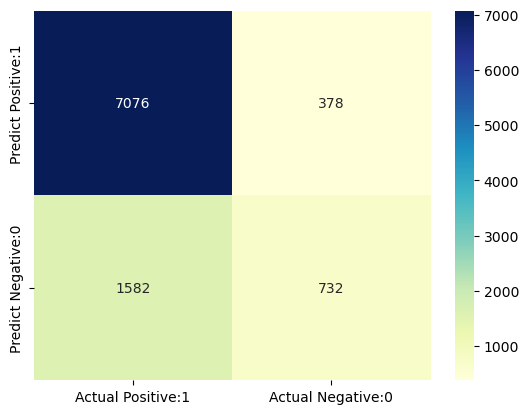

In [249]:
# visualize confusion matrix with seaborn heatmap 
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],  
index=['Predict Positive:1', 'Predict Negative:0']) 
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')  

### Classification metrices 

In [252]:
from sklearn.metrics import classification_report 
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

       <=50K       0.82      0.95      0.88      7454
        >50K       0.66      0.32      0.43      2314

    accuracy                           0.80      9768
   macro avg       0.74      0.63      0.65      9768
weighted avg       0.78      0.80      0.77      9768



### Classification accuracy 

In [255]:

TP = cm[0,0] 
TN = cm[1,1] 
FP = cm[0,1] 
FN = cm[1,0] 
# print classification accuracy 
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN) 
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy)) 

Classification accuracy : 0.7993


### Classification error 

In [257]:

# print classification error 
classification_error = (FP + FN) / float(TP + TN + FP + FN) 
print('Classification error : {0:0.4f}'.format(classification_error)) 

Classification error : 0.2007


### Precision 

In [261]:
# print precision score 
precision = TP / float(TP + FP) 
print('Precision : {0:0.4f}'.format(precision)) 

Precision : 0.9493


### Recall

In [264]:
recall = TP / float(TP + FN) 
print('Recall or Sensitivity : {0:0.4f}'.format(recall)) 

Recall or Sensitivity : 0.8173


### False Positive Rate 

In [267]:

false_positive_rate = FP / float(FP + TN) 
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate)) 
specificity = TN / (TN + FP) 
print('Specificity : {0:0.4f}'.format(specificity)) 

False Positive Rate : 0.3405
Specificity : 0.6595


### Calculate class probabilities 

In [271]:
# print the first 10 predicted probabilities of two classes- 0 and 1 
y_pred_prob = gnb.predict_proba(X_test)[0:10] 
print(y_pred_prob) 

[[9.87076209e-01 1.29237907e-02]
 [9.82719131e-01 1.72808694e-02]
 [9.96437663e-01 3.56233675e-03]
 [9.99548245e-01 4.51754768e-04]
 [9.90444197e-01 9.55580263e-03]
 [9.79718962e-01 2.02810377e-02]
 [9.80011271e-01 1.99887291e-02]
 [9.94971744e-01 5.02825600e-03]
 [9.82097974e-01 1.79020265e-02]
 [9.99352316e-01 6.47683850e-04]]


   Prob of - <=50K  Prob of - >50K
0         0.987076        0.012924
1         0.982719        0.017281
2         0.996438        0.003562
3         0.999548        0.000452
4         0.990444        0.009556
5         0.979719        0.020281
6         0.980011        0.019989
7         0.994972        0.005028
8         0.982098        0.017902
9         0.999352        0.000648
[0.01292379 0.01728087 0.00356234 0.00045175 0.0095558  0.02028104
 0.01998873 0.00502826 0.01790203 0.00064768]


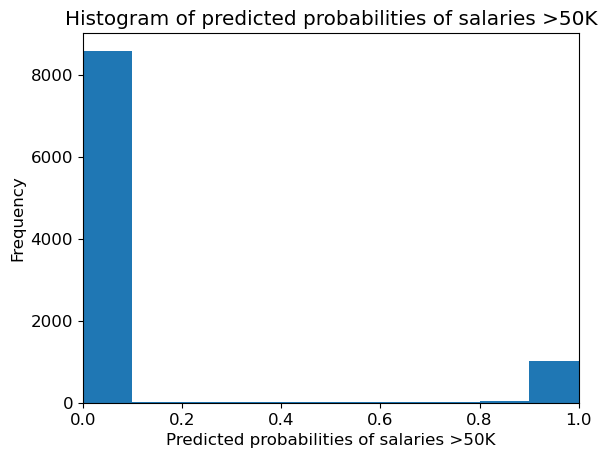

In [281]:
# Store the probabilities in a DataFrame
y_pred1 = gnb.predict_proba(X_test)[:, 1]
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - <=50K', 'Prob of - >50K'])
print(y_pred_prob_df)

# Print the first 10 predicted probabilities for class 1 - Probability of >50K
print(gnb.predict_proba(X_test)[0:10, 1])

# Plot histogram of predicted probabilities

# Adjust the font size
plt.rcParams['font.size'] = 12

# Plot histogram with 10 bins
plt.hist(y_pred1, bins=10)

# Set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of salaries >50K')

# Set the x-axis limit
plt.xlim(0, 1)

# Set the x and y-axis labels
plt.xlabel('Predicted probabilities of salaries >50K')
plt.ylabel('Frequency')

# Display the plot
plt.show()


## ROC - AUC  

In [284]:
# compute ROC AUC 
from sklearn.metrics import roc_auc_score 
ROC_AUC = roc_auc_score(y_test, y_pred1) 
print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8384


In [286]:
# Import necessary library
from sklearn.model_selection import cross_val_score 

# Calculate cross-validated ROC AUC
Cross_validated_ROC_AUC = cross_val_score(gnb, X_train, y_train, cv=5, scoring='roc_auc').mean()

# Print the result
print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))


Cross validated ROC AUC : 0.8300


##  k-Fold Cross Validati 

In [289]:
# Applying 10-Fold Cross Validation 
from sklearn.model_selection import cross_val_score 
scores = cross_val_score(gnb, X_train, y_train, cv = 10, scoring='accuracy') 
print('Cross-validation scores:{}'.format(scores)) 

Cross-validation scores:[0.79385965 0.78903509 0.79069767 0.79596314 0.78806494 0.78806494
 0.79815709 0.78938131 0.79640193 0.78894252]


In [291]:
# compute Average cross-validation score 
print('Average cross-validation score: {:.4f}'.format(scores.mean())) 

Average cross-validation score: 0.7919
